In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\User\\Downloads\\UNZIP_FOR_NOTEBOOKS_FINAL (1)\\DATA\\cancer_tumor_data_features.csv')

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [11]:
scaled_X = scaler.fit_transform(df)

In [13]:
cov_matrix=np.cov(df,rowvar=False)

In [15]:
eigen_values, eigen_vector = np.linalg.eig(cov_matrix)

In [17]:
eigen_vector.shape

(30, 30)

In [19]:
eigen_values

array([4.43782605e+05, 7.31010006e+03, 7.03833742e+02, 5.46487379e+01,
       3.98900178e+01, 3.00458768e+00, 1.81533030e+00, 3.71466740e-01,
       1.55513547e-01, 8.40612196e-02, 3.16089533e-02, 7.49736514e-03,
       3.16165652e-03, 2.16150395e-03, 1.32653879e-03, 6.40269304e-04,
       3.74883320e-04, 2.35169626e-04, 1.84583467e-04, 1.64180064e-04,
       7.81102011e-05, 5.76111660e-05, 3.49172775e-05, 2.83952689e-05,
       1.61463677e-05, 1.24902419e-05, 7.01997261e-07, 3.68048171e-06,
       2.84790425e-06, 2.00491564e-06])

In [21]:
aa = np.argsort(eigen_values)[len(eigen_values)-2:]

In [23]:
eigen_values, eigen_vectors = eigen_values[aa] , eigen_vector[:,aa]

In [25]:
eigen_values

array([  7310.10006165, 443782.6051466 ])

In [27]:
new_data = np.dot(scaled_X,eigen_vectors)

In [29]:
new_data

array([[-0.07012727,  2.52989536],
       [ 0.77632122,  2.79484458],
       [ 0.69056901,  2.25675902],
       ...,
       [ 0.29580493,  0.74270478],
       [ 0.7296145 ,  2.58577974],
       [-0.73495504, -1.78910114]])

In [34]:
from sklearn.decomposition import PCA

In [38]:
#help(PCA)

In [40]:
pca_model=PCA(n_components=2)

In [44]:
pca_model.fit(scaled_X)

PCA(n_components=2)

In [58]:
pc_results = pca_model.transform(scaled_X)

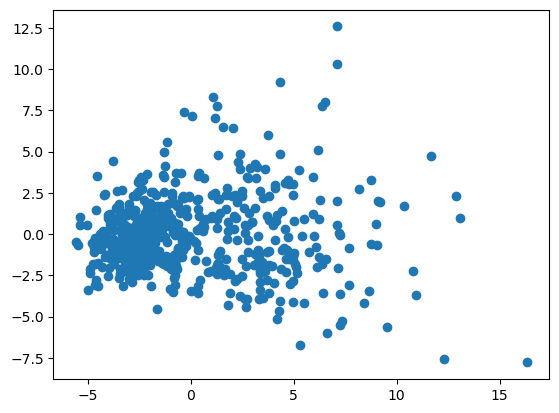

In [50]:
plt.scatter(pc_results[:,0],pc_results[:,1])
plt.show()

In [52]:
from sklearn.cluster import KMeans

In [74]:
model = KMeans(n_clusters=2)

In [76]:
model.fit(pc_results)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=2)

In [78]:
new = model.predict(pc_results)

In [81]:
pc_new = pd.DataFrame(data = pc_results, columns = ['PC1','PC2'])

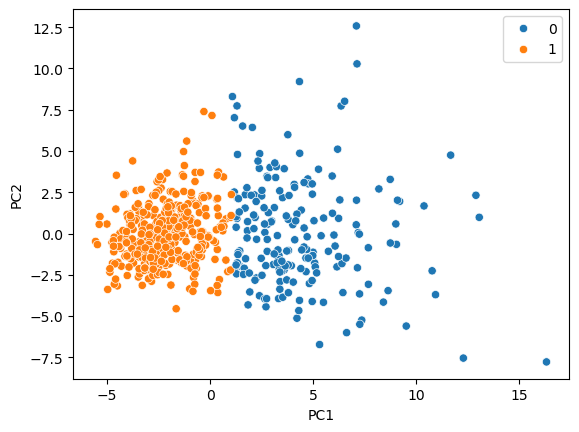

In [83]:
sns.scatterplot(data = pc_new, x='PC1',y='PC2',hue = new)
plt.show()

In [95]:
df_comp = pd.DataFrame(data = pca_model.components_, index = ['PC1','PC2'], columns = df.columns )

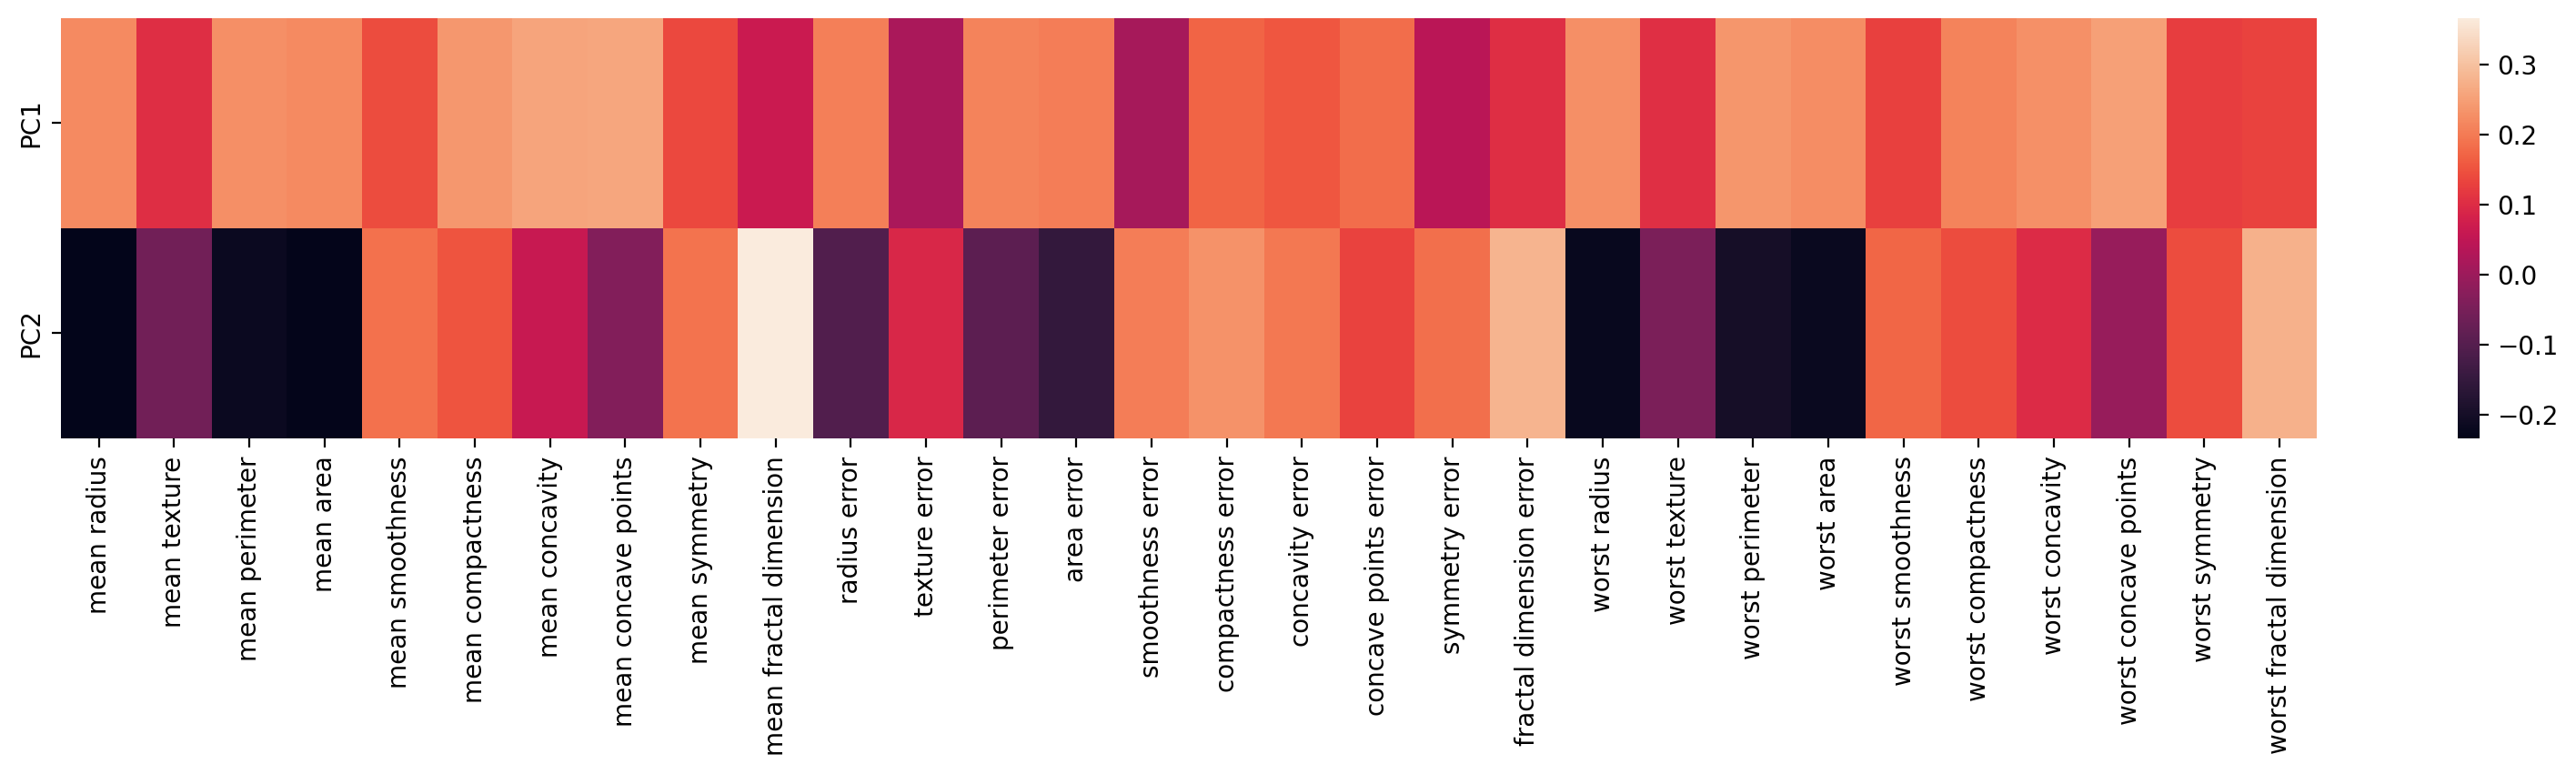

In [97]:
plt.figure(figsize=(20,3),dpi=200)
sns.heatmap(df_comp)
plt.show()

In [101]:
np.sum(pca_model.explained_variance_ratio_)

0.6324320765155945

In [103]:
exp_var = []
for n in range(1,30):
    pca_model = PCA(n_components=n)
    pca_model.fit(scaled_X)
    exp_var.append(np.sum(pca_model.explained_variance_ratio_))
    

In [105]:
exp_var

[0.4427202560752637,
 0.6324320765155945,
 0.7263637090899083,
 0.7923850582446098,
 0.8473427431680725,
 0.887587963566906,
 0.9100953006967311,
 0.9259825386969442,
 0.9398790324425353,
 0.9515688143366668,
 0.9613660042126471,
 0.970071383220026,
 0.9781166330919933,
 0.9833502905469196,
 0.986488122714547,
 0.9891502160796992,
 0.9911301840050235,
 0.9928841434552499,
 0.994533396514475,
 0.9955720432628138,
 0.996571139726514,
 0.9974857864775684,
 0.9982971477364675,
 0.998898981303139,
 0.9994150236823042,
 0.9996876116777816,
 0.9999176271402876,
 0.9999706050693258,
 0.9999955651725726]